Submitted by

Jamal Ahmad Khan (366394)

BESE-12B

# Lab Task: Enhancing Backpropagation and Experimenting with Deeper Networks

In this lab, you will extend your previous neural network implementation by adding more layers and optimizing the backpropagation process.

## Part 1: Extending the Neural Network to Multiple Hidden Layers

**Understanding Hidden Layers:**

> A hidden layer in the context of artificial neural networks refers to a layer of neurons that is neither the input nor the output layer. Hidden layers are what make neural networks "deep" and enable them to learn complex data representations. They are the computational workhorse of deep learning models, allowing neural networks to approximate functions and capture patterns from input data.

**Role of Hidden Layers:**

> The primary role of hidden layers is to transform inputs into something that the output layer can use. They do this by applying weights to the inputs and passing them through an activation function. This process allows the network to learn non-linear relationships between the input and output data.

**Task:** Modify your neural network from last week to handle multiple hidden layers. You will create a 3-layer network with two hidden layers.

- Input layer: Same as before (2 neurons)
- Hidden layer 1: 4 neurons (`tanh` activation)
- Hidden layer 2: 3 neurons (`ReLU` activation)
- Output layer: 1 neuron (`sigmoid` activation)

**Deliverables:**
- Code implementing the extended neural network with forward and backpropagation.
- A plot showing the loss curve over 1000 iterations.

In [33]:
# Initialize parameters for a 3-layer neural network
import numpy as np
# Code for weight initialization and forward pass (adapt this from your previous work)


In [34]:
import matplotlib.pyplot as plt

In [35]:
# Seed for reproducibility
np.random.seed(42)

In [36]:
# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [37]:
# Sample data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [38]:
# Parameters
input_neurons = 2
hidden1_neurons = 4
hidden2_neurons = 3
output_neurons = 1

In [39]:
# Initialize weights and biases
w_input_hidden1 = np.random.randn(input_neurons, hidden1_neurons)
b_hidden1 = np.random.randn(1, hidden1_neurons)

w_hidden1_hidden2 = np.random.randn(hidden1_neurons, hidden2_neurons)
b_hidden2 = np.random.randn(1, hidden2_neurons)

w_hidden2_output = np.random.randn(hidden2_neurons, output_neurons)
b_output = np.random.randn(1, output_neurons)

In [40]:
# Learning rate
learning_rate = 0.01

# Training
iterations = 1000
loss_history = []

In [41]:
for i in range(iterations):
    # Forward pass
    # Input to hidden layer 1
    hidden1_input = np.dot(X, w_input_hidden1) + b_hidden1
    hidden1_output = tanh(hidden1_input)

    # Hidden layer 1 to hidden layer 2
    hidden2_input = np.dot(hidden1_output, w_hidden1_hidden2) + b_hidden2
    hidden2_output = relu(hidden2_input)

    # Hidden layer 2 to output
    output_input = np.dot(hidden2_output, w_hidden2_output) + b_output
    predicted_output = sigmoid(output_input)

    # Calculate loss (Mean Squared Error)
    loss = np.mean((y - predicted_output) ** 2)
    loss_history.append(loss)

    # Backpropagation
    # Output layer error
    error_output = y - predicted_output
    delta_output = error_output * sigmoid_derivative(predicted_output)

    # Error and delta for hidden layer 2
    error_hidden2 = delta_output.dot(w_hidden2_output.T)
    delta_hidden2 = error_hidden2 * relu_derivative(hidden2_output)

    # Error and delta for hidden layer 1
    error_hidden1 = delta_hidden2.dot(w_hidden1_hidden2.T)
    delta_hidden1 = error_hidden1 * tanh_derivative(hidden1_output)

    # Update weights and biases
    w_hidden2_output += hidden2_output.T.dot(delta_output) * learning_rate
    b_output += np.sum(delta_output, axis=0, keepdims=True) * learning_rate

    w_hidden1_hidden2 += hidden1_output.T.dot(delta_hidden2) * learning_rate
    b_hidden2 += np.sum(delta_hidden2, axis=0, keepdims=True) * learning_rate

    w_input_hidden1 += X.T.dot(delta_hidden1) * learning_rate
    b_hidden1 += np.sum(delta_hidden1, axis=0, keepdims=True) * learning_rate

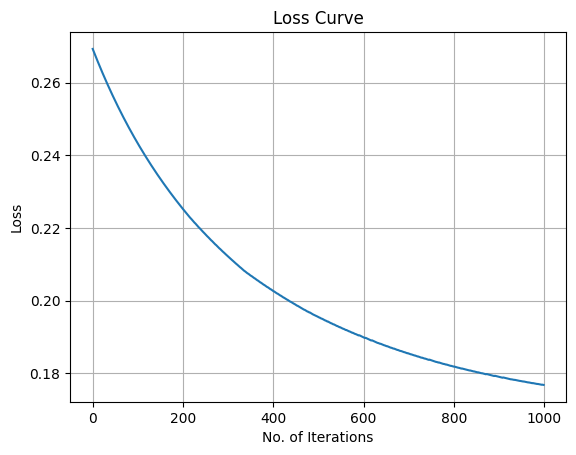

In [42]:
# Plotting the loss curve
plt.plot(loss_history)
plt.title('Loss Curve')
plt.xlabel('No. of Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

## Part 2: Experimenting with Different Activation Functions

**Understanding Activation Functions:**

> Activation functions are crucial to the learning capability of neural networks. They introduce non-linear properties to the network, allowing it to learn more complex patterns. Common activation functions include the sigmoid, tanh, and ReLU (Rectified Linear Unit).

**Task:** Experiment with different activation functions (`tanh`, `ReLU`, `Leaky ReLU`) and observe their impact on training performance.

**Deliverables:**
- Plots comparing the loss curves for each activation function.
- A brief explanation of the results.

In [ ]:
# # Implement different activation functions and test their performance
# def relu(Z):
#     return np.maximum(0, Z)

# def leaky_relu(Z):
#     return np.where(Z > 0, Z, 0.01 * Z)

# # Modify your network to test these activation functions

In [43]:
def leaky_relu(x):
    return np.where(x > 0, x, 0.01 * x)

def leaky_relu_derivative(x):
    return np.where(x > 0, 1, 0.01)

In [44]:
# Sample data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [45]:
# Parameters
input_neurons = 2
hidden1_neurons = 4
hidden2_neurons = 3
output_neurons = 1

In [46]:
# Training parameters
learning_rate = 0.01
iterations = 1000

In [47]:
# Function to train the network with different activation functions
def train_network(hidden_activation, hidden_activation_derivative, label):
    # Initialize weights and biases
    w_input_hidden1 = np.random.randn(input_neurons, hidden1_neurons)
    b_hidden1 = np.random.randn(1, hidden1_neurons)

    w_hidden1_hidden2 = np.random.randn(hidden1_neurons, hidden2_neurons)
    b_hidden2 = np.random.randn(1, hidden2_neurons)

    w_hidden2_output = np.random.randn(hidden2_neurons, output_neurons)
    b_output = np.random.randn(1, output_neurons)

    # To store loss values
    loss_history = []

    # Training loop
    for i in range(iterations):
        # Forward pass
        # Input to hidden layer 1
        hidden1_input = np.dot(X, w_input_hidden1) + b_hidden1
        hidden1_output = hidden_activation(hidden1_input)

        # Hidden layer 1 to hidden layer 2 (using ReLU)
        hidden2_input = np.dot(hidden1_output, w_hidden1_hidden2) + b_hidden2
        hidden2_output = relu(hidden2_input)

        # Hidden layer 2 to output (using Sigmoid)
        output_input = np.dot(hidden2_output, w_hidden2_output) + b_output
        predicted_output = sigmoid(output_input)

        # Calculate loss (Mean Squared Error)
        loss = np.mean((y - predicted_output) ** 2)
        loss_history.append(loss)

        # Backpropagation
        # Output layer error
        error_output = y - predicted_output
        delta_output = error_output * sigmoid_derivative(predicted_output)

        # Error and delta for hidden layer 2 (ReLU)
        error_hidden2 = delta_output.dot(w_hidden2_output.T)
        delta_hidden2 = error_hidden2 * relu_derivative(hidden2_output)

        # Error and delta for hidden layer 1 (variable activation function)
        error_hidden1 = delta_hidden2.dot(w_hidden1_hidden2.T)
        delta_hidden1 = error_hidden1 * hidden_activation_derivative(hidden1_output)

        # Update weights and biases
        w_hidden2_output += hidden2_output.T.dot(delta_output) * learning_rate
        b_output += np.sum(delta_output, axis=0, keepdims=True) * learning_rate

        w_hidden1_hidden2 += hidden1_output.T.dot(delta_hidden2) * learning_rate
        b_hidden2 += np.sum(delta_hidden2, axis=0, keepdims=True) * learning_rate

        w_input_hidden1 += X.T.dot(delta_hidden1) * learning_rate
        b_hidden1 += np.sum(delta_hidden1, axis=0, keepdims=True) * learning_rate

    return loss_history

In [48]:
# Train the network with different activation functions for the first hidden layer
loss_tanh = train_network(tanh, tanh_derivative, 'tanh')
loss_relu = train_network(relu, relu_derivative, 'ReLU')
loss_leaky_relu = train_network(leaky_relu, leaky_relu_derivative, 'Leaky ReLU')

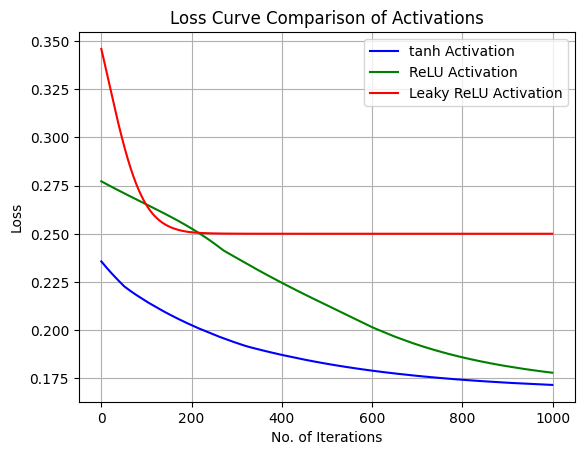

In [49]:
# Plotting the loss curves
plt.plot(loss_tanh, label='tanh Activation', color='blue')
plt.plot(loss_relu, label='ReLU Activation', color='green')
plt.plot(loss_leaky_relu, label='Leaky ReLU Activation', color='red')
plt.title('Loss Curve Comparison of Activations')
plt.xlabel('No. of Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

## Part 3: Optimizing Backpropagation with Advanced Techniques

**Task:** Implement optimization techniques like weight initialization (Xavier, He), gradient clipping, or momentum.

**Deliverables:**
- Code with optimization techniques applied.
- A comparison of loss curves before and after applying these techniques.

In [50]:
# Example: Implementing Xavier initialization and Gradient Clipping
def initialize_parameters_xavier(layer_dims):
    np.random.seed(1)
    parameters = {}
    for l in range(1, len(layer_dims)):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(1 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    return parameters

# Gradient clipping can be implemented during backpropagation
def clip_gradients(gradients, clip_value=1.0):
    for key in gradients.keys():
        gradients[key] = np.clip(gradients[key], -clip_value, clip_value)
    return gradients

# Modify your backpropagation and gradient update steps to apply these techniques

In [54]:
# He Initialization
def initialize_parameters_he(layer_dims):
    np.random.seed(1)
    parameters = {}
    for l in range(1, len(layer_dims)):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    return parameters

In [51]:
# Sample data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [52]:
# Parameters
input_neurons = 2
hidden1_neurons = 4
hidden2_neurons = 3
output_neurons = 1

In [53]:
# Training parameters
learning_rate = 0.01
iterations = 1000

In [55]:
# Function to train the network with optimization techniques
def train_network(initialization_method, apply_gradient_clipping=False, clip_value=1.0):
    # Initialize weights and biases using the specified initialization method
    layer_dims = [input_neurons, hidden1_neurons, hidden2_neurons, output_neurons]
    parameters = initialization_method(layer_dims)

    # Storing loss history
    loss_history = []

    for i in range(iterations):
        # Forward pass
        # Input to hidden layer 1
        Z1 = np.dot(X, parameters['W1'].T) + parameters['b1'].T
        A1 = relu(Z1)

        # Hidden layer 1 to hidden layer 2
        Z2 = np.dot(A1, parameters['W2'].T) + parameters['b2'].T
        A2 = relu(Z2)

        # Hidden layer 2 to output
        Z3 = np.dot(A2, parameters['W3'].T) + parameters['b3'].T
        predicted_output = sigmoid(Z3)

        # Calculating loss (Mean Squared Error)
        loss = np.mean((y - predicted_output) ** 2)
        loss_history.append(loss)

        # Back pass
        # Output layer error
        dZ3 = predicted_output - y
        dW3 = np.dot(dZ3.T, A2) / X.shape[0]
        db3 = np.sum(dZ3, axis=0, keepdims=True) / X.shape[0]

        # Hidden layer 2 error
        dA2 = np.dot(dZ3, parameters['W3'])
        dZ2 = dA2 * relu_derivative(Z2)
        dW2 = np.dot(dZ2.T, A1) / X.shape[0]
        db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]

        # Hidden layer 1 error
        dA1 = np.dot(dZ2, parameters['W2'])
        dZ1 = dA1 * relu_derivative(Z1)
        dW1 = np.dot(dZ1.T, X) / X.shape[0]
        db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]

        # Combine gradients
        gradients = {'dW1': dW1, 'db1': db1.T, 'dW2': dW2, 'db2': db2.T, 'dW3': dW3, 'db3': db3.T}

        # Applying gradient clipping if specified
        if apply_gradient_clipping:
            gradients = clip_gradients(gradients, clip_value)

        # Updating weights and biases
        parameters['W1'] -= learning_rate * gradients['dW1']
        parameters['b1'] -= learning_rate * gradients['db1']

        parameters['W2'] -= learning_rate * gradients['dW2']
        parameters['b2'] -= learning_rate * gradients['db2']

        parameters['W3'] -= learning_rate * gradients['dW3']
        parameters['b3'] -= learning_rate * gradients['db3']

    return loss_history

In [56]:
# Training with different optimization techniques
loss_no_optimization = train_network(initialize_parameters_xavier, apply_gradient_clipping=False)
loss_xavier_clipping = train_network(initialize_parameters_xavier, apply_gradient_clipping=True, clip_value=1.0)
loss_he_clipping = train_network(initialize_parameters_he, apply_gradient_clipping=True, clip_value=1.0)

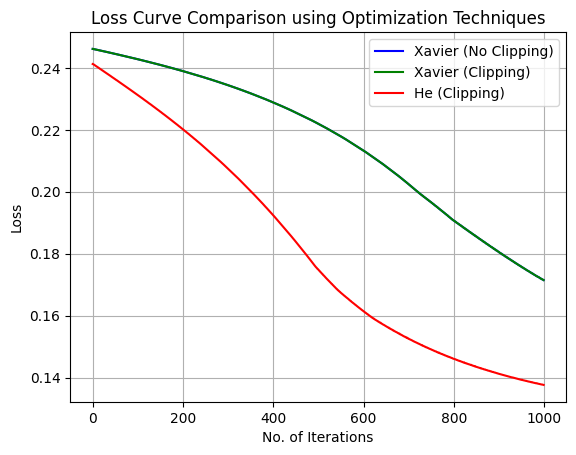

In [59]:
# Plotting the loss curves
plt.plot(loss_no_optimization, label='Xavier (No Clipping)', color='blue')
plt.plot(loss_xavier_clipping, label='Xavier (Clipping)', color='green')
plt.plot(loss_he_clipping, label='He (Clipping)', color='red')
plt.title('Loss Curve Comparison using Optimization Techniques')
plt.xlabel('No. of Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

## Part 4: Learning Rate Tuning

**Task:** Experiment with different learning rates and observe how they impact the speed of convergence.

Choose several learning rates (e.g., 0.01, 0.1, 0.5) and run your network for each learning rate.
Plot the loss curve for each learning rate and compare them.

**Deliverables:**
- A plot of the loss curves for different learning rates.
- A discussion on how learning rate affects convergence.

In [60]:
# Implement different learning rates and compare their performance
learning_rates = [0.01, 0.1, 0.5]
# Modify your training loop to try different learning rates and plot the loss curves for each


In [61]:
# Function to train the network with different learning rates
def train_network(learning_rate):
    # Initialize weights and biases using Xavier initialization
    layer_dims = [input_neurons, hidden1_neurons, hidden2_neurons, output_neurons]
    parameters = initialize_parameters_xavier(layer_dims)

    # Store loss history
    loss_history = []

    for i in range(1000):  # Fixed to 1000 iterations
        # Forward pass
        # Input to hidden layer 1
        Z1 = np.dot(X, parameters['W1'].T) + parameters['b1'].T
        A1 = relu(Z1)

        # Hidden layer 1 to hidden layer 2
        Z2 = np.dot(A1, parameters['W2'].T) + parameters['b2'].T
        A2 = relu(Z2)

        # Hidden layer 2 to output
        Z3 = np.dot(A2, parameters['W3'].T) + parameters['b3'].T
        predicted_output = sigmoid(Z3)

        # Calculate loss (Mean Squared Error)
        loss = np.mean((y - predicted_output) ** 2)
        loss_history.append(loss)

        # Backpropagation
        # Output layer error
        dZ3 = predicted_output - y
        dW3 = np.dot(dZ3.T, A2) / X.shape[0]
        db3 = np.sum(dZ3, axis=0, keepdims=True) / X.shape[0]

        # Hidden layer 2 error
        dA2 = np.dot(dZ3, parameters['W3'])
        dZ2 = dA2 * relu_derivative(Z2)
        dW2 = np.dot(dZ2.T, A1) / X.shape[0]
        db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]

        # Hidden layer 1 error
        dA1 = np.dot(dZ2, parameters['W2'])
        dZ1 = dA1 * relu_derivative(Z1)
        dW1 = np.dot(dZ1.T, X) / X.shape[0]
        db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]

        # Update weights and biases
        parameters['W1'] -= learning_rate * dW1
        parameters['b1'] -= learning_rate * db1.T

        parameters['W2'] -= learning_rate * dW2
        parameters['b2'] -= learning_rate * db2.T

        parameters['W3'] -= learning_rate * dW3
        parameters['b3'] -= learning_rate * db3.T

    return loss_history

In [62]:
# Train the network with different learning rates
loss_curves = {}

for lr in learning_rates:
    loss_curves[lr] = train_network(lr)

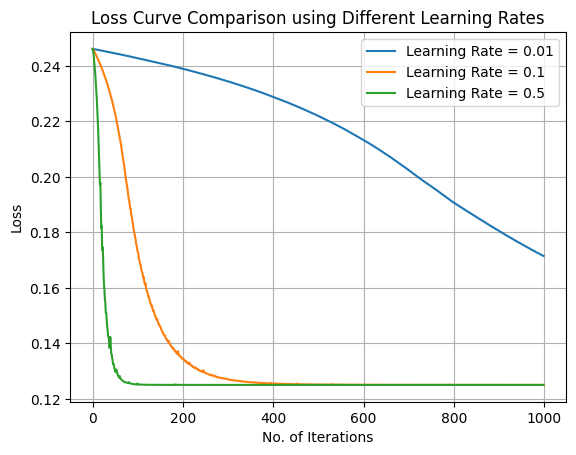

In [63]:
# Plotting the loss curves for different learning rates
for lr, loss_history in loss_curves.items():
    plt.plot(loss_history, label=f'Learning Rate = {lr}')

plt.title('Loss Curve Comparison using Different Learning Rates')
plt.xlabel('No. of Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

## Part 5: Mini-batch Gradient Descent

**Task:** Implement mini-batch gradient descent and compare its performance with standard batch gradient descent.

- Split the dataset into mini-batches (e.g., 64 samples per batch).
- Run the training process using mini-batch gradient descent.
- Compare the loss curve and accuracy with batch gradient descent.

**Deliverables:**
- Code implementing mini-batch gradient descent.
- A comparison plot of loss curves for batch and mini-batch gradient descent.

In [ ]:
# # Implement mini-batch gradient descent
# def mini_batch_gradient_descent(X, Y, parameters, batch_size=64, learning_rate=0.1, num_epochs=1000):
#     m = X.shape[1]
#     for epoch in range(num_epochs):
#         shuffled_indices = np.random.permutation(m)
#         X_shuffled = X[:, shuffled_indices]
#         Y_shuffled = Y[:, shuffled_indices].reshape((1, m))
#         for i in range(0, m, batch_size):
#             X_batch = X_shuffled[:, i:i+batch_size]
#             Y_batch = Y_shuffled[:, i:i+batch_size]
#             # Perform forward and backward pass for each mini-batch and update parameters
#             # Use your existing backpropagation code here


In [71]:
# Sample Data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
y = np.array([[0, 1, 1, 0]])

In [64]:
# Forward propagation
def forward_propagation(X, parameters):
    W1, b1 = parameters['W1'], parameters['b1']
    W2, b2 = parameters['W2'], parameters['b2']
    W3, b3 = parameters['W3'], parameters['b3']

    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)

    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    return A3, cache

In [65]:
# Backward propagation
def backward_propagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y
    dW3 = np.dot(dZ3, A2.T) / m
    db3 = np.sum(dZ3, axis=1, keepdims=True) / m

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2, "dW3": dW3, "db3": db3}

    return gradients

In [66]:
# Parameter update
def update_parameters(parameters, gradients, learning_rate):
    for key in parameters.keys():
        parameters[key] -= learning_rate * gradients["d" + key]
    return parameters

In [67]:
# Mini-batch gradient descent
def mini_batch_gradient_descent(X, Y, layer_dims, batch_size=2, learning_rate=0.1, num_epochs=1000):
    parameters = initialize_parameters_xavier(layer_dims)
    m = X.shape[1]
    loss_history = []

    for epoch in range(num_epochs):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[:, shuffled_indices]
        Y_shuffled = Y[:, shuffled_indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[:, i:i + batch_size]
            Y_batch = Y_shuffled[:, i:i + batch_size]

            # Forward and backward propagation
            A3, cache = forward_propagation(X_batch, parameters)
            gradients = backward_propagation(X_batch, Y_batch, cache)
            parameters = update_parameters(parameters, gradients, learning_rate)

        # Calculate loss for the epoch
        A3, _ = forward_propagation(X, parameters)
        loss = np.mean((Y - A3) ** 2)
        loss_history.append(loss)

    return parameters, loss_history

In [68]:
# Batch gradient descent
def batch_gradient_descent(X, Y, layer_dims, learning_rate=0.1, num_epochs=1000):
    parameters = initialize_parameters_xavier(layer_dims)
    loss_history = []

    for epoch in range(num_epochs):
        # Forward and backward propagation for the entire dataset
        A3, cache = forward_propagation(X, parameters)
        gradients = backward_propagation(X, Y, cache)
        parameters = update_parameters(parameters, gradients, learning_rate)

        # Calculate loss for the epoch
        loss = np.mean((Y - A3) ** 2)
        loss_history.append(loss)

    return parameters, loss_history

In [69]:
# Define layer dimensions
layer_dims = [2, 4, 3, 1]  # Input, Hidden1, Hidden2, Output

In [72]:
# Training with mini-batch gradient descent
parameters_mini_batch, loss_history_mini_batch = mini_batch_gradient_descent(X, y, layer_dims, batch_size=2, learning_rate=0.1, num_epochs=1000)

In [73]:
# Training with batch gradient descent
parameters_batch, loss_history_batch = batch_gradient_descent(X, y, layer_dims, learning_rate=0.1, num_epochs=1000)

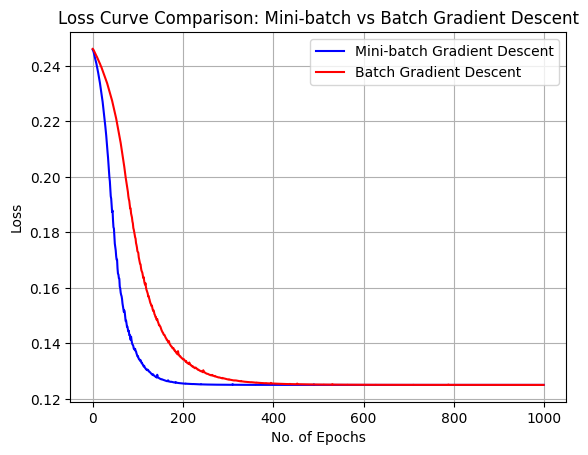

In [74]:
# Plotting the loss curves
plt.plot(loss_history_mini_batch, label='Mini-batch Gradient Descent', color='blue')
plt.plot(loss_history_batch, label='Batch Gradient Descent', color='red')
plt.title('Loss Curve Comparison: Mini-batch vs Batch Gradient Descent')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()



---

